In [117]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-play-store/googleplaystore.csv
/kaggle/input/google-play-store/googleplaystore_user_reviews.csv


# Google Play Store

In [118]:
print(os.path.join(dirname, filenames[0]))
df_ps = pd.read_csv(os.path.join(dirname, filenames[0]))
df_ps.info()


/kaggle/input/google-play-store/googleplaystore.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [119]:
df_ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [120]:
df_ps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [121]:
df_ps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [122]:
df_ps.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

In [123]:
df_ps.duplicated().sum()

483

In [124]:
df_ps = df_ps.drop_duplicates()

In [125]:
df_ps.duplicated().sum()

0

In [126]:
for column in df_ps:
        print("Column"," ",column,"  uniquevalue are :", df_ps[column].nunique())
        print(df_ps[column].unique())
        print("------------------------------------------------------------------") 

Column   App   uniquevalue are : 9660
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
------------------------------------------------------------------
Column   Category   uniquevalue are : 34
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
------------------------------------------------------------------
Column   Rating   uniquevalue are : 40
[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4

In [127]:
for column in df_ps:
        print("Column"," ",column,"  value count is :", df_ps[column].value_counts())
        print("------------------------------------------------------------------") 

Column   App   value count is : App
ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Theme Android P Black design for LG V30          1
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: count, Length: 9660, dtype: int64
------------------------------------------------------------------
Column   Category   value count is : Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           36

In [128]:
for column in df_ps:
        print( "column name:", column, "- misisng values ",df_ps[column].isnull().sum())
        print("------------------------------------------------------------------") 

column name: App - misisng values  0
------------------------------------------------------------------
column name: Category - misisng values  0
------------------------------------------------------------------
column name: Rating - misisng values  1465
------------------------------------------------------------------
column name: Reviews - misisng values  0
------------------------------------------------------------------
column name: Size - misisng values  0
------------------------------------------------------------------
column name: Installs - misisng values  0
------------------------------------------------------------------
column name: Type - misisng values  1
------------------------------------------------------------------
column name: Price - misisng values  0
------------------------------------------------------------------
column name: Content Rating - misisng values  1
------------------------------------------------------------------
column name: Genres - misisng

In [129]:
for column in df_ps:
    missing_values = df_ps[column].isnull().sum()
    if missing_values > 0:
        print("-------------------------")
        print("column name:", column, "- missing values:", missing_values)
        print("------------------------------------------------------------------")

-------------------------
column name: Rating - missing values: 1465
------------------------------------------------------------------
-------------------------
column name: Type - missing values: 1
------------------------------------------------------------------
-------------------------
column name: Content Rating - missing values: 1
------------------------------------------------------------------
-------------------------
column name: Current Ver - missing values: 8
------------------------------------------------------------------
-------------------------
column name: Android Ver - missing values: 3
------------------------------------------------------------------


In [130]:
df_ps.describe()

,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# 1.1 - Rating

Let's fix the ratings column first

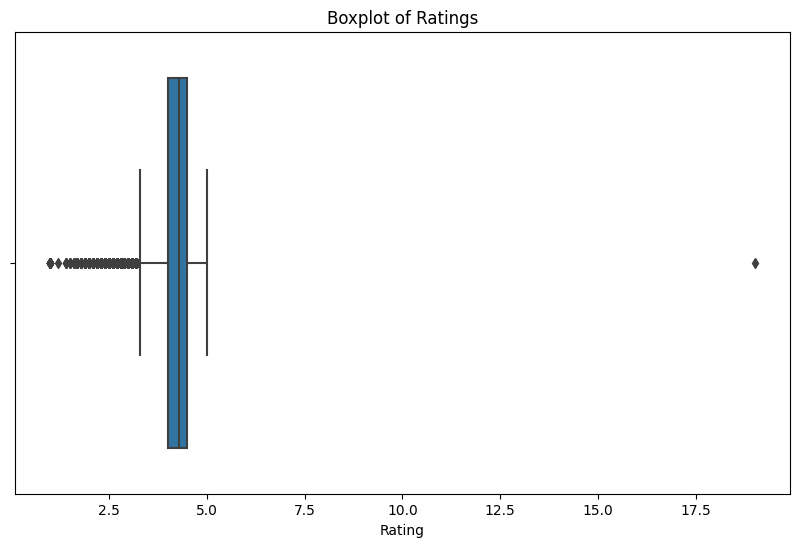

In [131]:
#df_ps.info()



# Drop rows with NaN values in the "Rating" column
#df_ps_cleaned = df_ps.dropna(subset=['Rating'])

# Create a boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_ps['Rating'])
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()


Removing the column with 19 rating only. Will get back to column with Nan rating, should these rows be removed or not?

In [132]:
invalid_value = 19
df_ps = df_ps[df_ps['Rating'] != invalid_value]


Now eda on the column ratings only

In [133]:
# Descriptive statistics for Ratings
rating_stats = df_ps['Rating'].describe()
print(rating_stats)

count    8892.000000
mean        4.187877
std         0.522377
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64


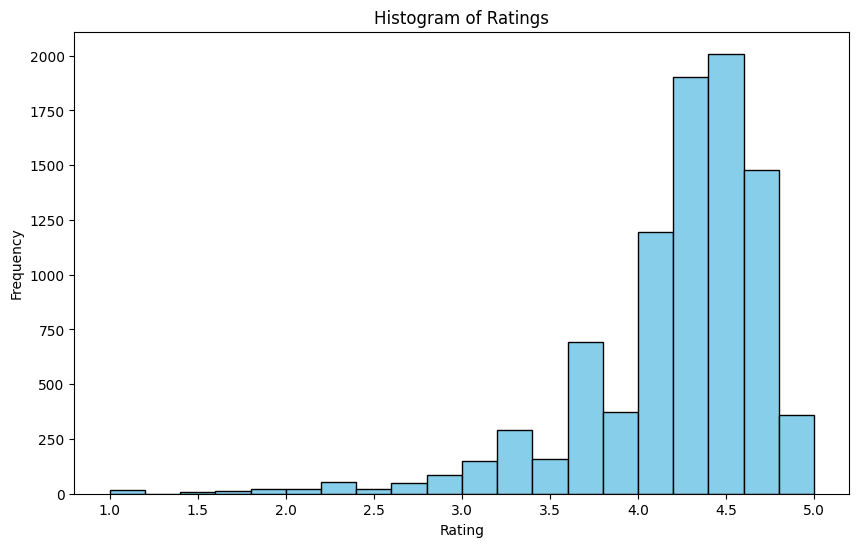

In [134]:
# Histogram for Ratings
plt.figure(figsize=(10, 6))
plt.hist(df_ps['Rating'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


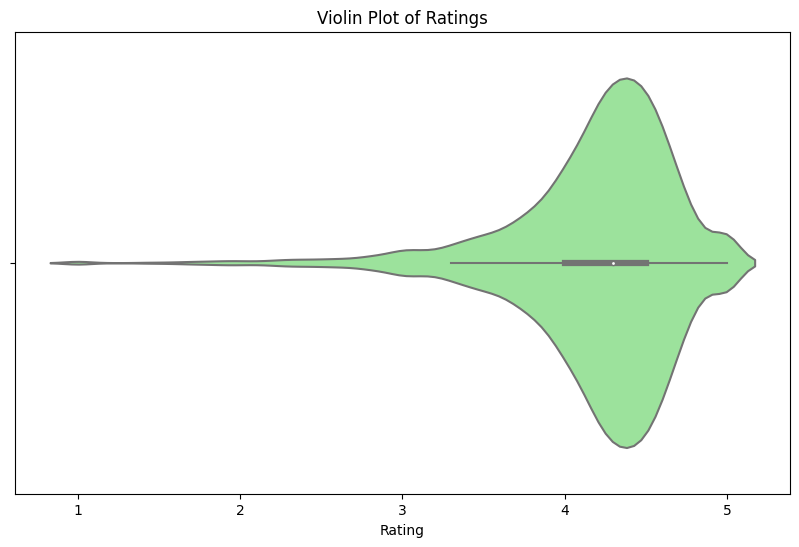

In [135]:
# Violin plot for Ratings
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_ps['Rating'], color='lightgreen')
plt.title('Violin Plot of Ratings')
plt.xlabel('Rating')
plt.show()


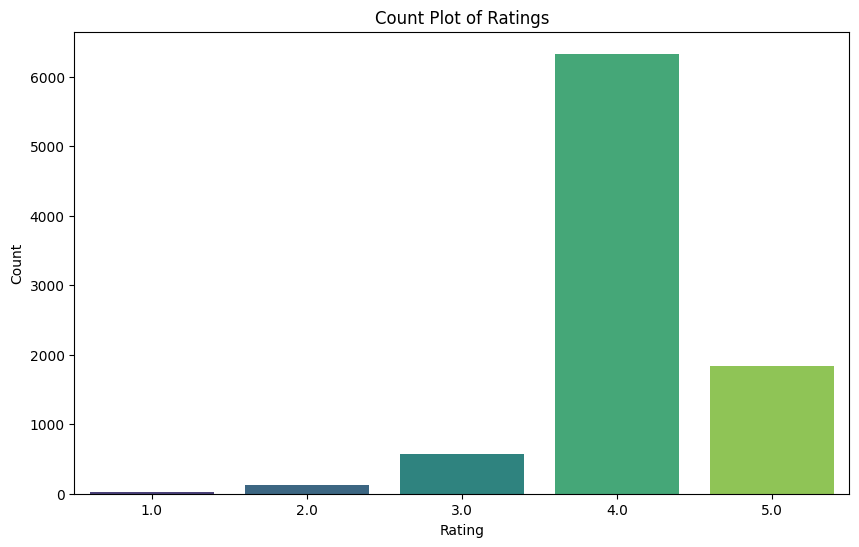

In [136]:
# Count plot for Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x=df_ps['Rating'].round(), palette='viridis')
plt.title('Count Plot of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [137]:
# Correlation matrix
#cannot calculate this because no ther numeric column in the df
# correlation_matrix = df_ps.corr()
# rating_correlation = correlation_matrix['Rating']
# print(rating_correlation)


# 1.2 - Category

Exploratory Data Analysis (EDA) for the "Category" column in your DataFrame df_ps involves understanding the distribution and characteristics of the categories. Here are some EDA techniques you can apply:

In [138]:
# Count of unique categories
category_counts = df_ps['Category'].value_counts()
print(category_counts)


Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64


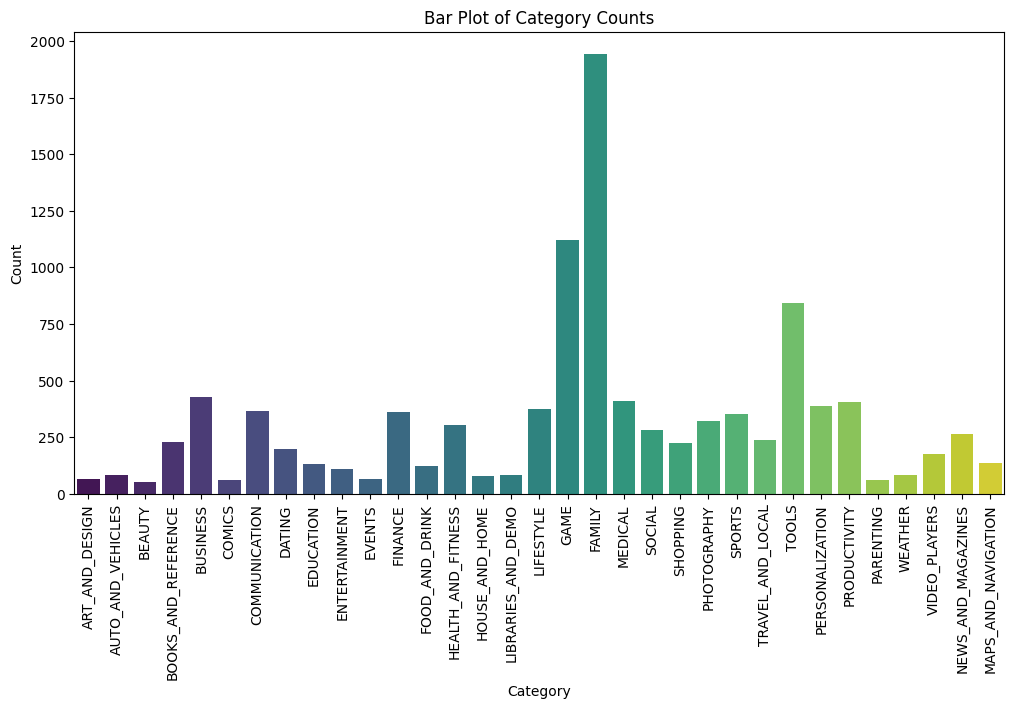

In [139]:
# Bar plot of category counts
plt.figure(figsize=(12, 6))
sns.countplot(x=df_ps['Category'], palette='viridis')
plt.title('Bar Plot of Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [140]:
# Proportion of categories
#Calculate the proportion of each category relative to the total number of entries.
category_proportions = df_ps['Category'].value_counts(normalize=True)
print(category_proportions)


Category
FAMILY                 0.187603
GAME                   0.108236
TOOLS                  0.081394
BUSINESS               0.041228
MEDICAL                0.039394
PRODUCTIVITY           0.039297
PERSONALIZATION        0.037463
LIFESTYLE              0.036014
COMMUNICATION          0.035338
FINANCE                0.034759
SPORTS                 0.033890
PHOTOGRAPHY            0.031090
HEALTH_AND_FITNESS     0.029545
SOCIAL                 0.027035
NEWS_AND_MAGAZINES     0.025490
TRAVEL_AND_LOCAL       0.022883
BOOKS_AND_REFERENCE    0.022207
SHOPPING               0.021628
DATING                 0.018924
VIDEO_PLAYERS          0.016897
MAPS_AND_NAVIGATION    0.013228
EDUCATION              0.012552
FOOD_AND_DRINK         0.011973
ENTERTAINMENT          0.010717
AUTO_AND_VEHICLES      0.008207
LIBRARIES_AND_DEMO     0.008207
WEATHER                0.007917
HOUSE_AND_HOME         0.007724
ART_AND_DESIGN         0.006276
EVENTS                 0.006179
PARENTING              0.005793

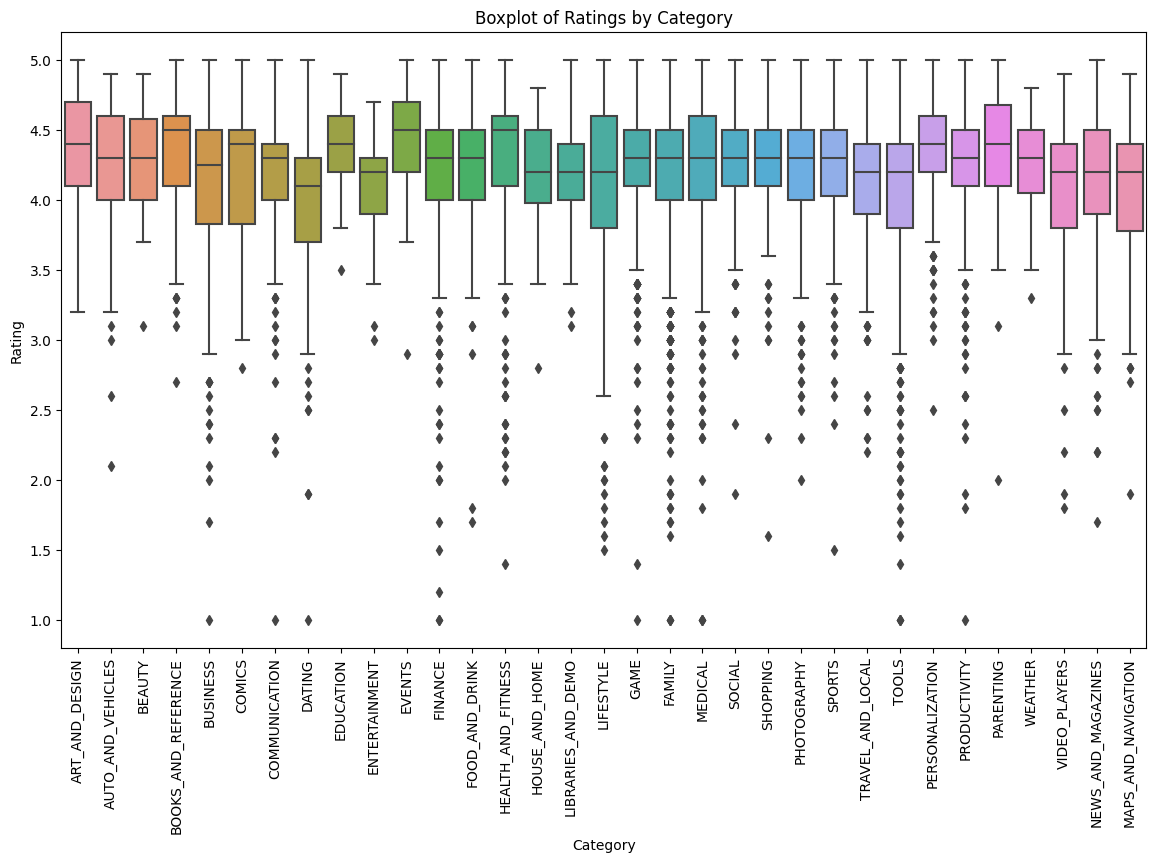

In [141]:
# Boxplot of ratings by category
plt.figure(figsize=(14, 8))
sns.boxplot(x=df_ps['Category'], y=df_ps['Rating'])
plt.title('Boxplot of Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


In [142]:
#Compute aggregated statistics (e.g., mean, median) for the "Rating" column grouped by category.

# Aggregated statistics by category
category_aggregated_stats = df_ps.groupby('Category')['Rating'].agg(['mean', 'median', 'count'])
print(category_aggregated_stats)


                         mean  median  count
Category                                    
ART_AND_DESIGN       4.358065    4.40     62
AUTO_AND_VEHICLES    4.190411    4.30     73
BEAUTY               4.278571    4.30     42
BOOKS_AND_REFERENCE  4.347458    4.50    177
BUSINESS             4.102593    4.25    270
COMICS               4.155172    4.40     58
COMMUNICATION        4.151466    4.30    307
DATING               3.971698    4.10    159
EDUCATION            4.375969    4.40    129
ENTERTAINMENT        4.136036    4.20    111
EVENTS               4.435556    4.50     45
FAMILY               4.191153    4.30   1718
FINANCE              4.127445    4.30    317
FOOD_AND_DRINK       4.164151    4.30    106
GAME                 4.281285    4.30   1074
HEALTH_AND_FITNESS   4.261450    4.50    262
HOUSE_AND_HOME       4.164706    4.20     68
LIBRARIES_AND_DEMO   4.178462    4.20     65
LIFESTYLE            4.096066    4.20    305
MAPS_AND_NAVIGATION  4.051613    4.20    124
MEDICAL   

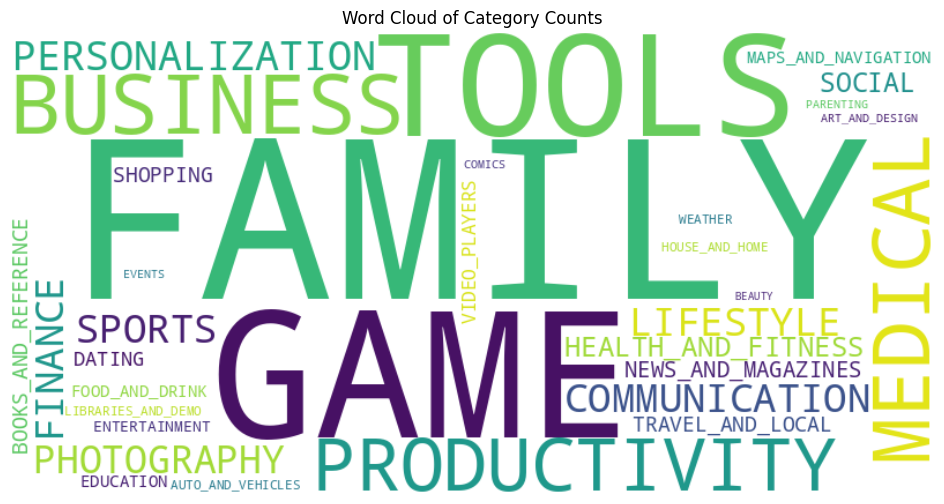

In [143]:
#Create a word cloud to visually represent the prominence of different categories.
# Generate a word cloud for categories
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_counts)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Category Counts')
plt.show()


# 1.3 - Reviews

In [144]:
# Convert "Reviews" column to numeric, coerce errors to NaN
df_ps['Reviews'] = pd.to_numeric(df_ps['Reviews'], errors='coerce')

# Handle the specific entry "3.0M" (replace with 3000000)
#this row has been dropped already found out later
df_ps['Reviews'] = df_ps['Reviews'].fillna(df_ps['Reviews'].replace('3.0M', 3000000))

# Verify the changes
print(df_ps['Reviews'].dtype)
df_ps.info()

int64
<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [145]:
# Descriptive statistics for Reviews
reviews_stats = df_ps['Reviews'].describe()
print(reviews_stats)

count    1.035700e+04
mean     4.059046e+05
std      2.696778e+06
min      0.000000e+00
25%      3.200000e+01
50%      1.680000e+03
75%      4.641600e+04
max      7.815831e+07
Name: Reviews, dtype: float64


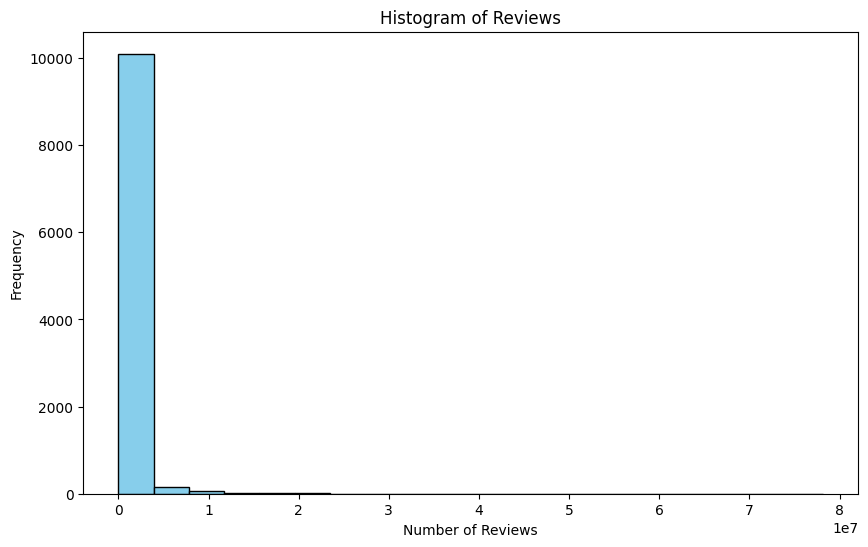

In [146]:
# Histogram for Reviews
plt.figure(figsize=(10, 6))
plt.hist(df_ps['Reviews'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

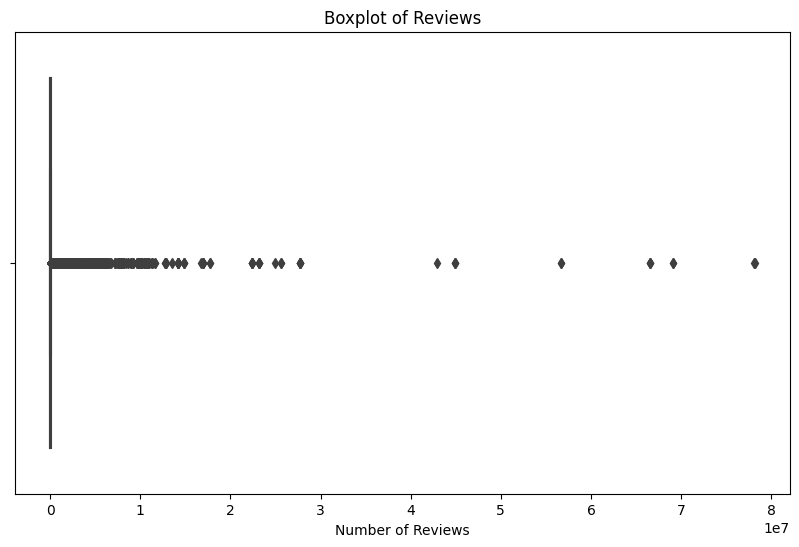

In [147]:
# Boxplot for Reviews
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_ps['Reviews'])
plt.title('Boxplot of Reviews')
plt.xlabel('Number of Reviews')
plt.show()

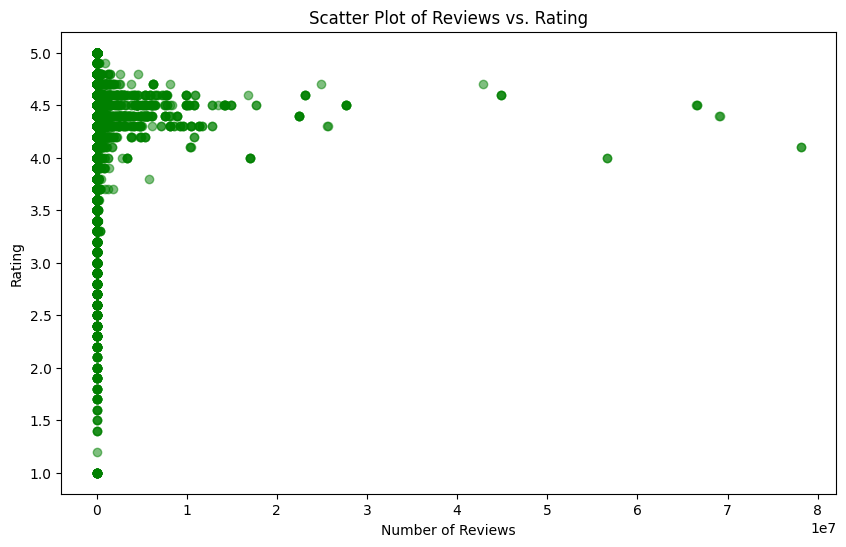

In [148]:
# Scatter plot of Reviews vs. Rating
plt.figure(figsize=(10, 6))
plt.scatter(df_ps['Reviews'], df_ps['Rating'], alpha=0.5, color='green')
plt.title('Scatter Plot of Reviews vs. Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()


In [149]:
# Aggregated statistics by category
category_aggregated_reviews = df_ps.groupby('Category')['Reviews'].agg(['mean', 'median', 'count'])
print(category_aggregated_reviews)

                             mean   median  count
Category                                         
ART_AND_DESIGN       2.637600e+04    564.0     65
AUTO_AND_VEHICLES    1.369019e+04    348.0     85
BEAUTY               7.476226e+03    187.0     53
BOOKS_AND_REFERENCE  9.510099e+04    206.0    230
BUSINESS             2.894185e+04     16.0    427
COMICS               5.638793e+04   1576.5     60
COMMUNICATION        1.642824e+06  13729.5    366
DATING               2.829284e+04    852.5    196
EDUCATION            1.781962e+05  17283.5    130
ENTERTAINMENT        4.285650e+05  44550.0    111
EVENTS               2.515906e+03     47.0     64
FAMILY               2.042059e+05    939.0   1943
FINANCE              4.722192e+04    476.0    360
FOOD_AND_DRINK       6.186755e+04   6312.5    124
GAME                 1.262745e+06  51791.0   1121
HEALTH_AND_FITNESS   1.008013e+05   4372.0    306
HOUSE_AND_HOME       3.493465e+04   3960.5     80
LIBRARIES_AND_DEMO   1.220139e+04    131.0     85


Rating     0.068732
Reviews    1.000000
Name: Reviews, dtype: float64


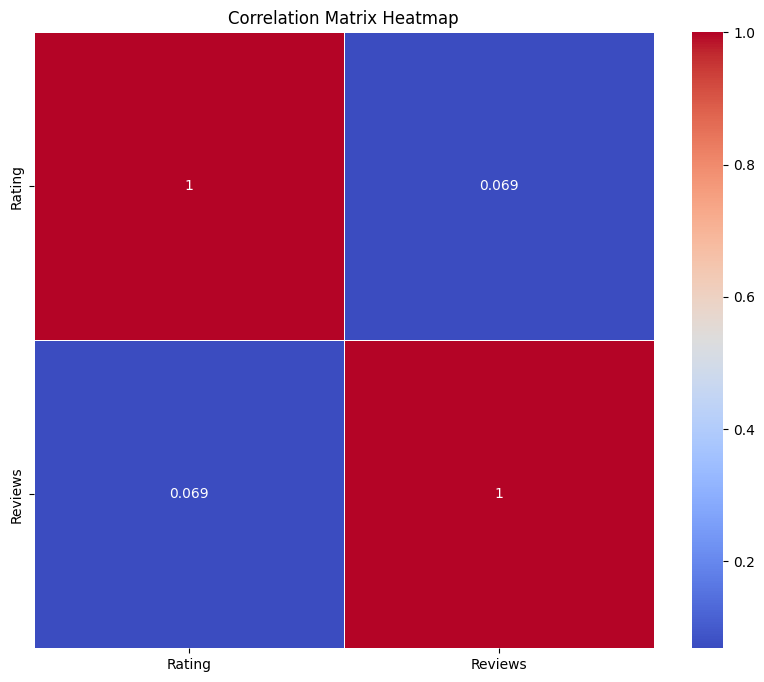

In [150]:
# Selecting numeric columns only
numeric_columns = df_ps.select_dtypes(include=['float64', 'int64'])

# Correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Correlation of "Reviews" with other numeric columns
reviews_correlation = correlation_matrix['Reviews']
print(reviews_correlation)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# 1.4- Price

The column price is object by default we can change it to numeric type so that we can do better analysis

In [151]:
#df_ps['Price'] = pd.to_numeric(df_ps['Price'], errors='coerce')
df_ps['Price'] = pd.to_numeric(df_ps['Price'].str.replace('$', ''), errors='coerce')

df_ps.info()



<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [152]:
price_summary = df_ps['Price'].describe()
#print(price_summary)
df_ps['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10357, dtype: float64

In [153]:
# Assuming your DataFrame is named df_ps
non_zero_prices = df_ps[df_ps['Price'] != 0]['Price']
print(non_zero_prices)


234       4.99
235       4.99
427       3.99
476       3.99
477       6.99
         ...  
10735     0.99
10760     7.99
10782    16.99
10785     1.20
10798     1.04
Name: Price, Length: 765, dtype: float64


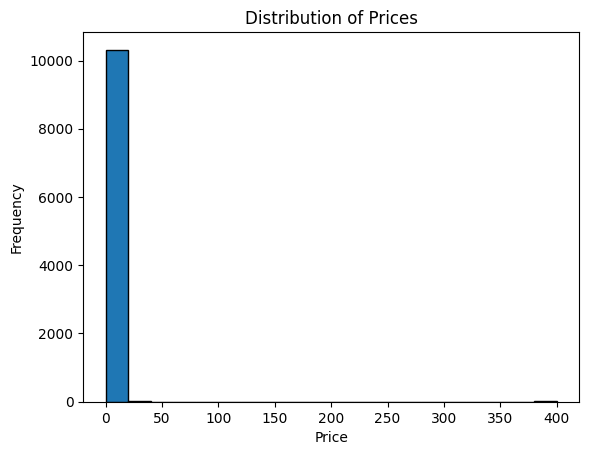

In [154]:
#To visualize the distribution of prices, you can create a histogram:


plt.hist(df_ps['Price'].dropna(), bins=20, edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


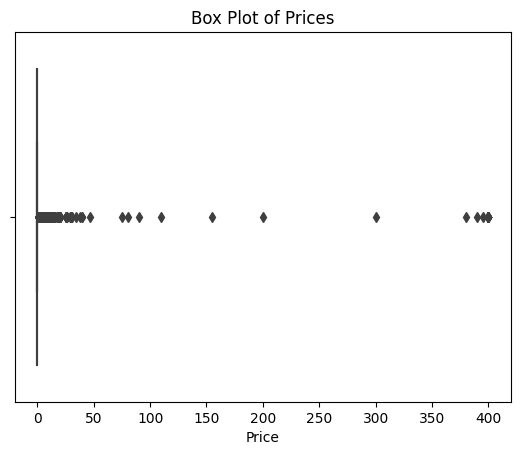

In [155]:
#A box plot can also be useful to identify the presence of outliers:
sns.boxplot(x=df_ps['Price'])
plt.title('Box Plot of Prices')
plt.show()


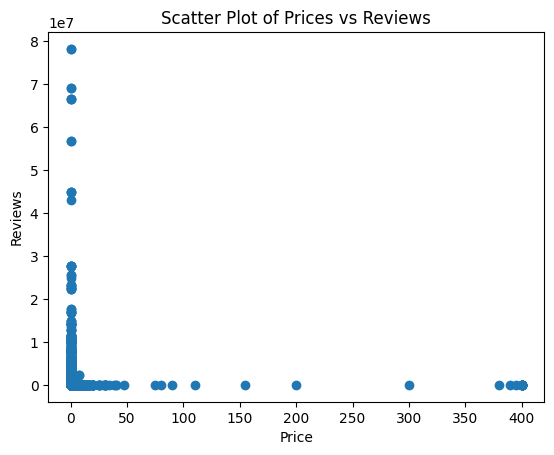

In [156]:
#If you want to explore the relationship between prices and reviews:

plt.scatter(df_ps['Price'], df_ps['Reviews'])
plt.title('Scatter Plot of Prices vs Reviews')
plt.xlabel('Price')
plt.ylabel('Reviews')
plt.show()




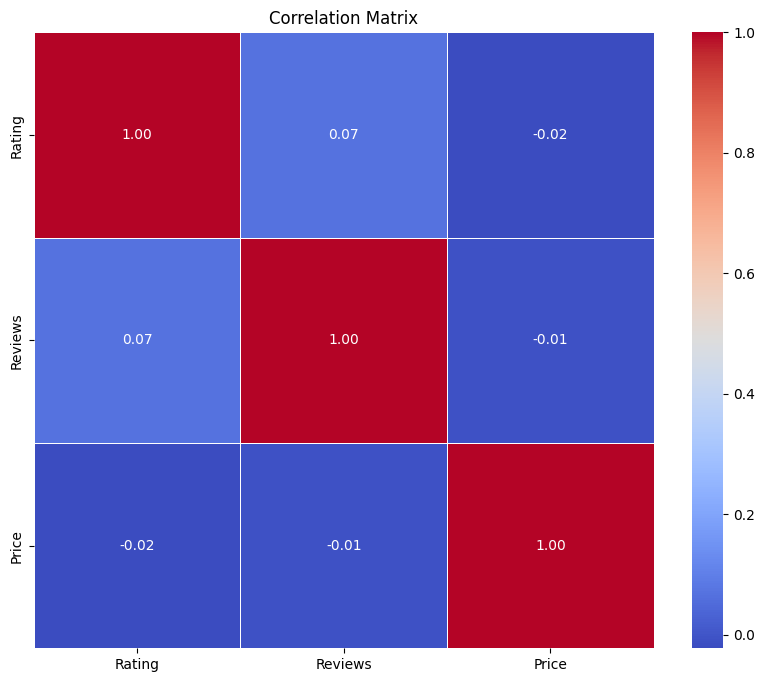

In [157]:
# Select only numeric columns for correlation analysis
numeric_columns = df_ps.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix
correlation_matrix = df_ps[numeric_columns].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 1.5- Android Version

In [158]:
#unique values and counts
android_versions_counts = df_ps['Android Ver'].value_counts()
print(android_versions_counts)


Android Ver
4.1 and up            2379
4.0.3 and up          1451
4.0 and up            1337
Varies with device    1221
4.4 and up             894
2.3 and up             643
5.0 and up             546
4.2 and up             387
2.3.3 and up           279
2.2 and up             239
3.0 and up             237
4.3 and up             235
2.1 and up             133
1.6 and up             116
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64


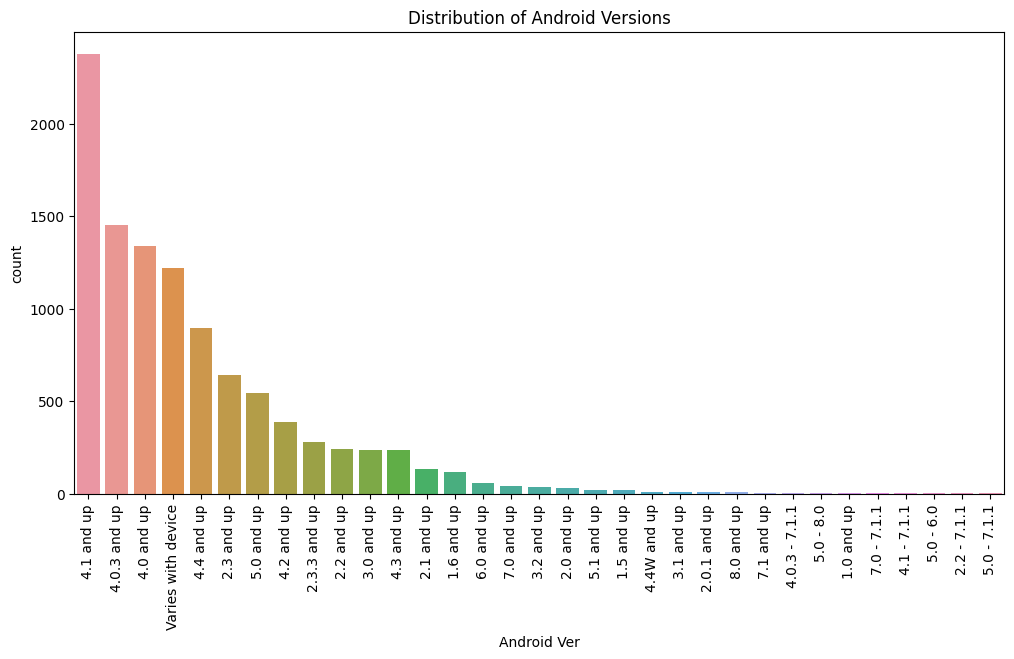

In [159]:


plt.figure(figsize=(12, 6))
sns.countplot(x='Android Ver', data=df_ps, order=df_ps['Android Ver'].value_counts().index)
plt.title('Distribution of Android Versions')
plt.xticks(rotation=90)
plt.show()


In [160]:
# android_versions_counts.plot.pie(autopct='%1.1f%%', figsize=(10, 10))
# plt.title('Distribution of Android Versions')
# plt.ylabel('')  # Remove the 'Android Ver' label for better aesthetics
# plt.show()


In [161]:
#missing values in android versions
missing_android_versions = df_ps['Android Ver'].isnull().sum()
print(f"Number of missing values in 'Android Ver': {missing_android_versions}")


Number of missing values in 'Android Ver': 2


# 1.6- Content Rating

In [162]:
content_rating_counts = df_ps['Content Rating'].value_counts()
print(content_rating_counts)


Content Rating
Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: count, dtype: int64


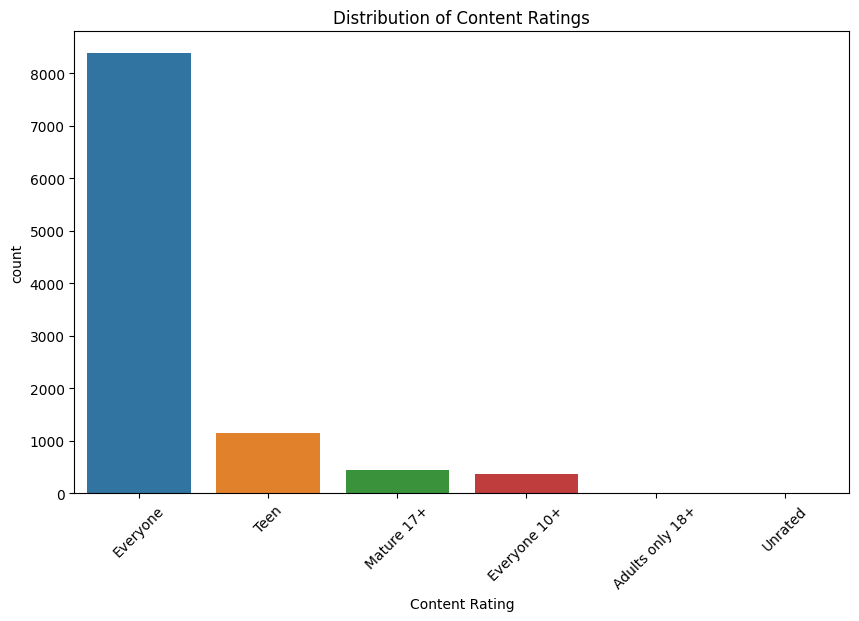

In [163]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Content Rating', data=df_ps, order=df_ps['Content Rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.xticks(rotation=45)
plt.show()


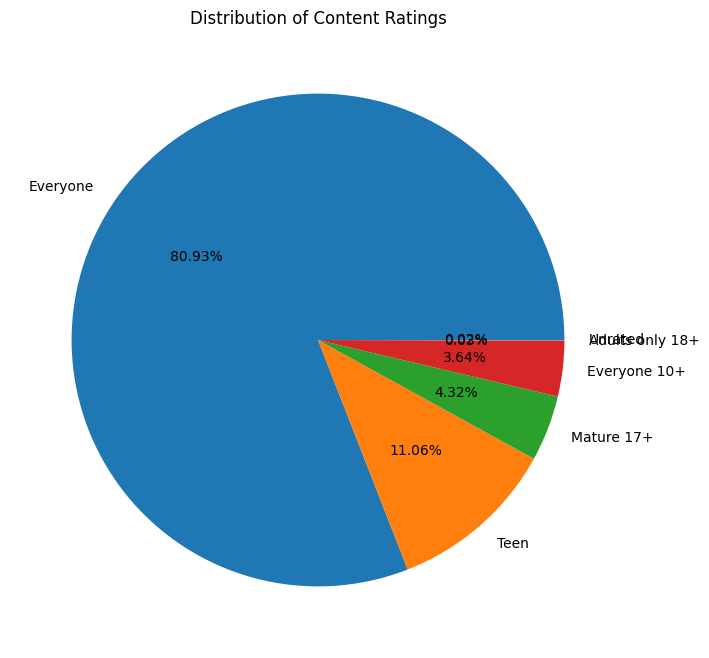

In [164]:
content_rating_counts.plot.pie(autopct='%1.2f%%', figsize=(8, 8))
plt.title('Distribution of Content Ratings')
plt.ylabel('')  # Remove the 'Content Rating' label for better aesthetics
plt.show()


In [165]:
#missing values in content rating
missing_content_rating = df_ps['Content Rating'].isnull().sum()
print(f"Number of missing values in 'Content Rating': {missing_content_rating}")


Number of missing values in 'Content Rating': 0


# 1.7- Genres

In [166]:
genres_counts = df_ps['Genres'].value_counts()
print(genres_counts)


Genres
Tools                                842
Entertainment                        588
Education                            527
Business                             427
Medical                              408
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: count, Length: 119, dtype: int64


In [167]:


# plt.figure(figsize=(14, 6))
# sns.countplot(x='Genres', data=df_ps, order=df_ps['Genres'].value_counts().index)
# plt.title('Distribution of Genres')
# plt.xticks(rotation=90)
# plt.show()


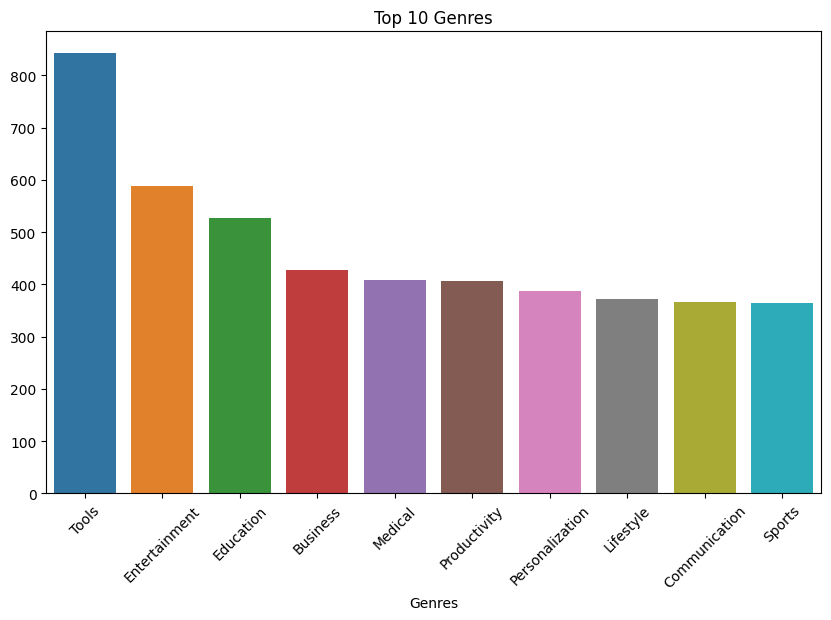

In [168]:
top_n_genres = 10  # Change this value as needed
top_genres_counts = df_ps['Genres'].value_counts().nlargest(top_n_genres)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres_counts.index, y=top_genres_counts.values)
plt.title(f'Top {top_n_genres} Genres')
plt.xticks(rotation=45)
plt.show()


In [169]:
missing_genres = df_ps['Genres'].isnull().sum()
print(f"Number of missing values in 'Genres': {missing_genres}")


Number of missing values in 'Genres': 0


# 1.8 - Type

In [170]:
type_counts = df_ps['Type'].value_counts()
print(type_counts)


Type
Free    9591
Paid     765
Name: count, dtype: int64


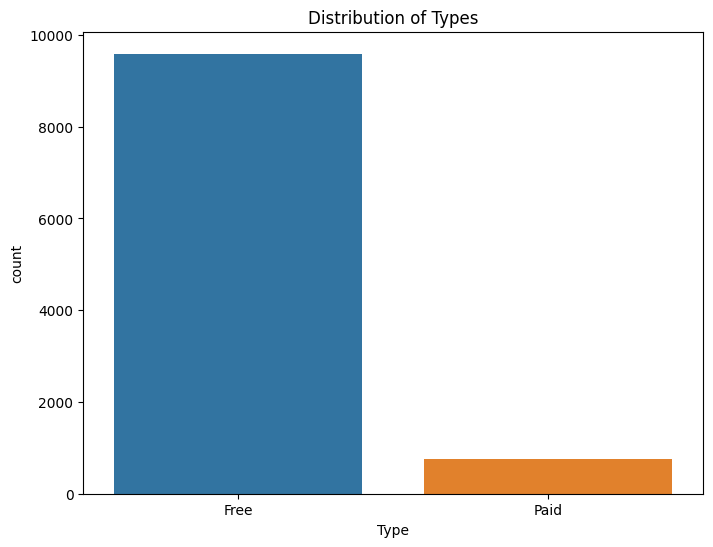

In [171]:


plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=df_ps)
plt.title('Distribution of Types')
plt.show()


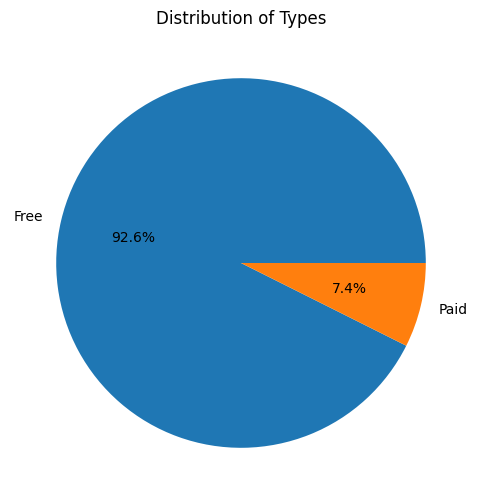

In [172]:
type_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6))
plt.title('Distribution of Types')
plt.ylabel('')  # Remove the 'Type' label for better aesthetics
plt.show()


In [173]:
missing_type = df_ps['Type'].isnull().sum()
print(f"Number of missing values in 'Type': {missing_type}")


Number of missing values in 'Type': 1


# 1.9 - Installs

In [174]:


# Remove the '+' sign and convert to numeric
df_ps['Installs'] = pd.to_numeric(df_ps['Installs'].str.replace('+', '').str.replace(',', ''), errors='coerce')

# 'coerce' parameter is used to handle any values that cannot be converted to numeric, replacing them with NaN


In [175]:
installs_summary = df_ps['Installs'].describe()
print(installs_summary)


count    1.035700e+04
mean     1.415776e+07
std      8.023955e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64


In [176]:


# plt.hist(df_ps['Installs'].dropna(), bins=20, edgecolor='black')
# plt.title('Distribution of Installs')
# plt.xlabel('Installs')
# plt.ylabel('Frequency')
# plt.show()


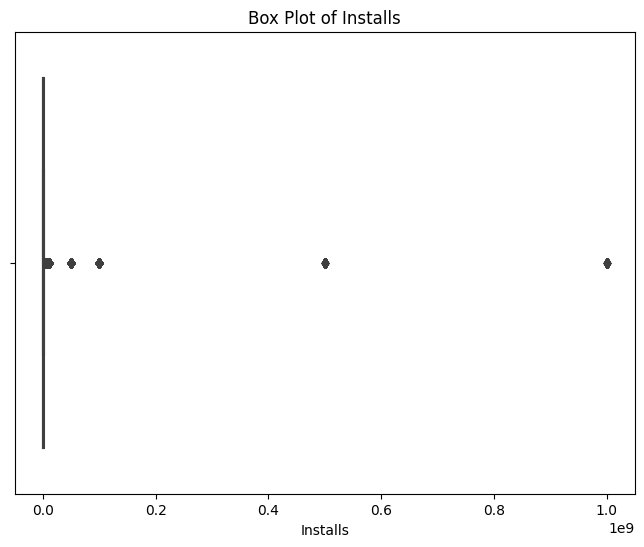

In [177]:


plt.figure(figsize=(8, 6))
sns.boxplot(x=df_ps['Installs'])
plt.title('Box Plot of Installs')
plt.show()


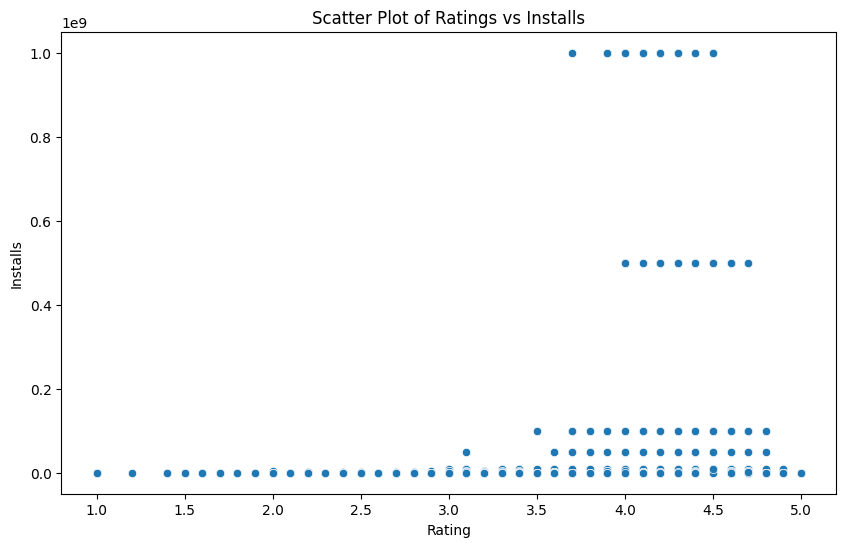

In [178]:


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Installs', data=df_ps)
plt.title('Scatter Plot of Ratings vs Installs')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.show()


In [179]:
# plt.figure(figsize=(14, 8))
# sns.boxplot(x='Category', y='Installs', data=df_ps)
# plt.title('Box Plot of Installs by Category')
# plt.xticks(rotation=90)
# plt.show()


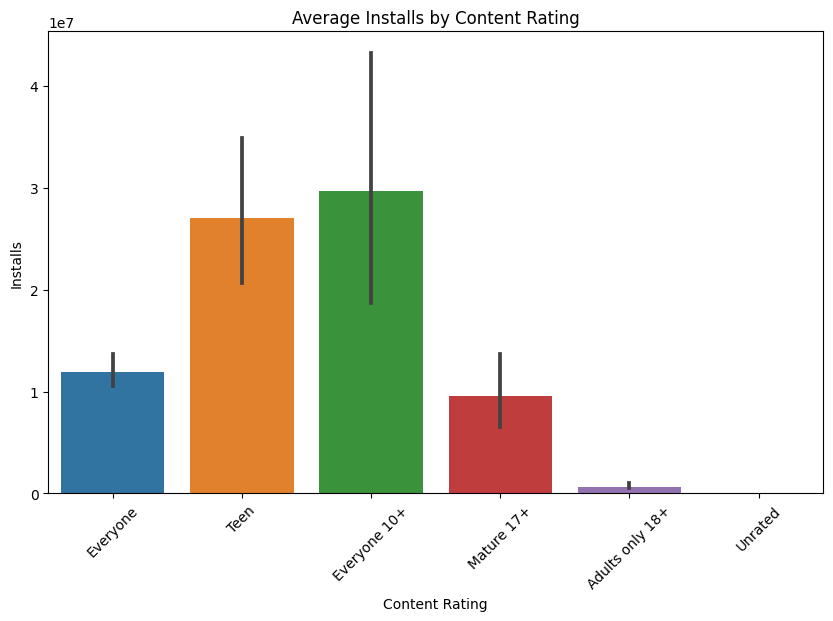

In [180]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Content Rating', y='Installs', data=df_ps)
plt.title('Average Installs by Content Rating')
plt.xticks(rotation=45)
plt.show()


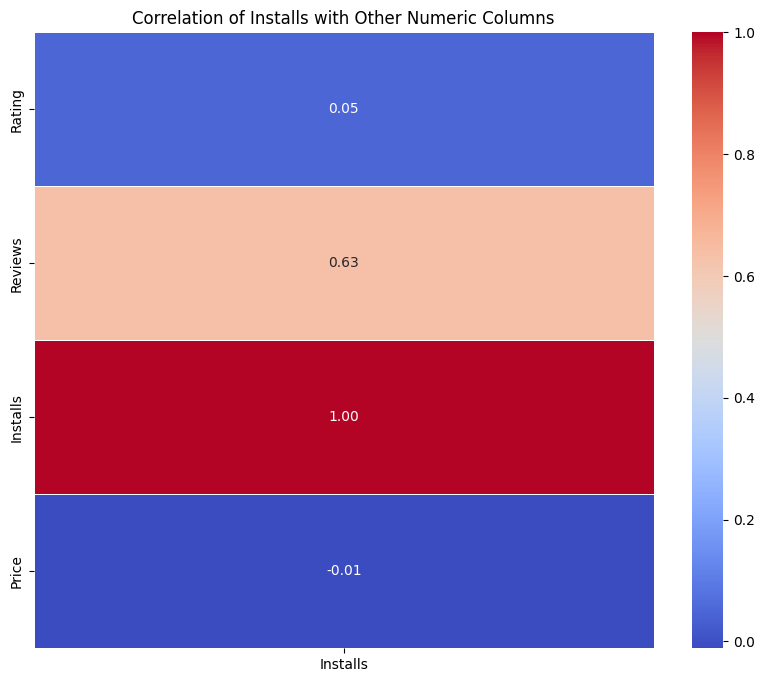

In [181]:
numeric_columns = df_ps.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_ps[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['Installs']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation of Installs with Other Numeric Columns')
plt.show()


# 1.10 - Size

Now there is a column size that tells about the memory that is needed for a particular application. If we look at the values they are in MB and KB. Important thing to note over here is that there are alot of values that have the values "Varies with device" that means we can't convert this column to numeric.

# 1.11 - Last Updated

In [182]:

df_ps['Last Updated'] = pd.to_datetime(df_ps['Last Updated'], format='%B %d, %Y', errors='coerce')
# 'coerce' parameter is used to handle any values that cannot be converted to datetime, replacing them with NaT (Not a Time)


In [183]:
date_summary = df_ps['Last Updated'].describe()
print(date_summary)


count                            10357
mean     2017-11-14 09:25:19.320266496
min                2010-05-21 00:00:00
25%                2017-09-03 00:00:00
50%                2018-05-20 00:00:00
75%                2018-07-19 00:00:00
max                2018-08-08 00:00:00
Name: Last Updated, dtype: object


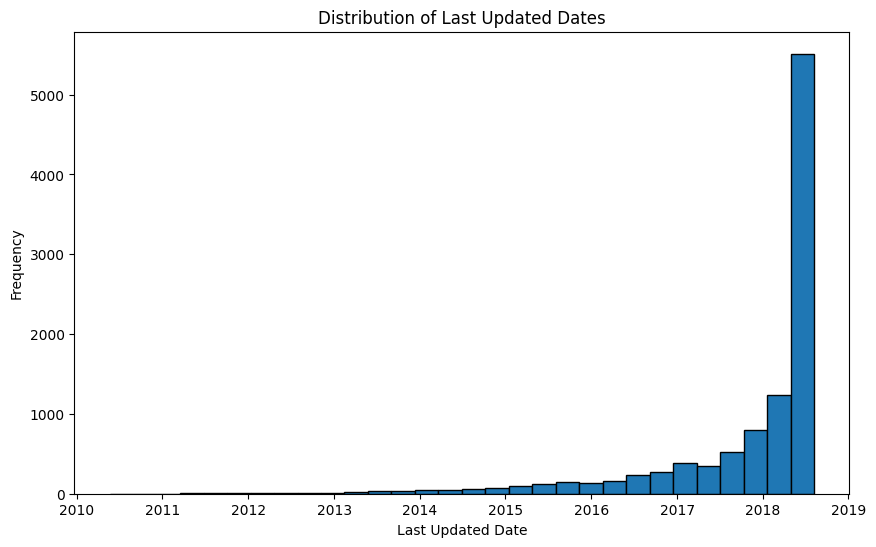

In [184]:


plt.figure(figsize=(10, 6))
plt.hist(df_ps['Last Updated'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Last Updated Dates')
plt.xlabel('Last Updated Date')
plt.ylabel('Frequency')
plt.show()


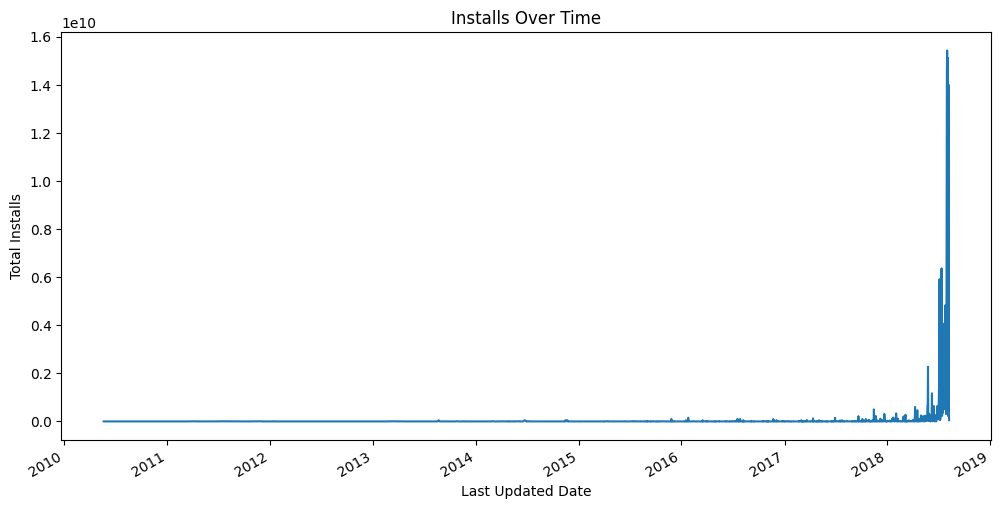

In [185]:
plt.figure(figsize=(12, 6))
df_ps.groupby('Last Updated')['Installs'].sum().plot()
plt.title('Installs Over Time')
plt.xlabel('Last Updated Date')
plt.ylabel('Total Installs')
plt.show()


# 1.12 - Current Version

In [186]:
current_version_counts = df_ps['Current Ver'].value_counts()
print(current_version_counts)


Current Ver
Varies with device    1302
1.0                    802
1.1                    260
1.2                    177
2.0                    149
                      ... 
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
7.1.34.28                1
2.0.148.0                1
Name: count, Length: 2831, dtype: int64


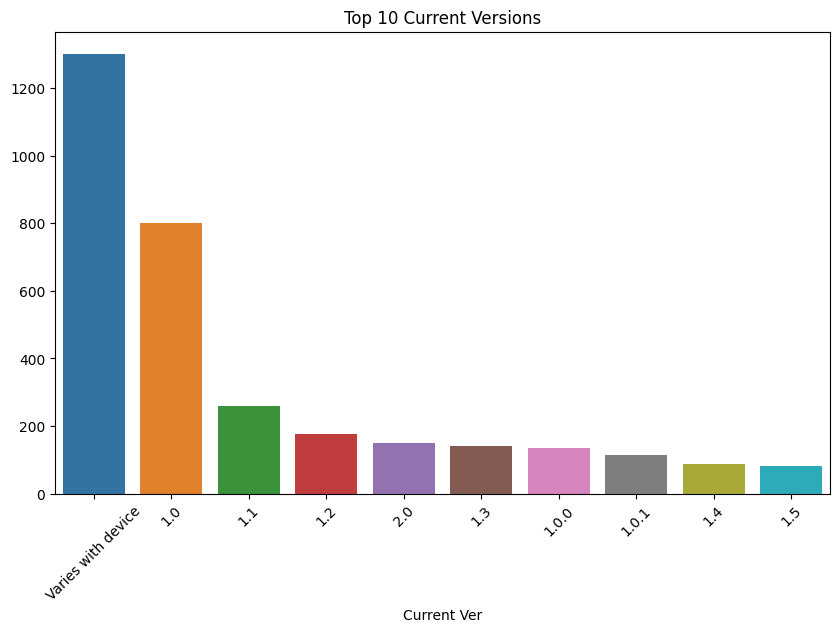

In [187]:
top_n_versions = 10  # Change this value as needed
top_versions_counts = df_ps['Current Ver'].value_counts().nlargest(top_n_versions)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_versions_counts.index, y=top_versions_counts.values)
plt.title(f'Top {top_n_versions} Current Versions')
plt.xticks(rotation=45)
plt.show()


In [188]:
missing_current_version = df_ps['Current Ver'].isnull().sum()
print(f"Number of missing values in 'Current Ver': {missing_current_version}")


Number of missing values in 'Current Ver': 8


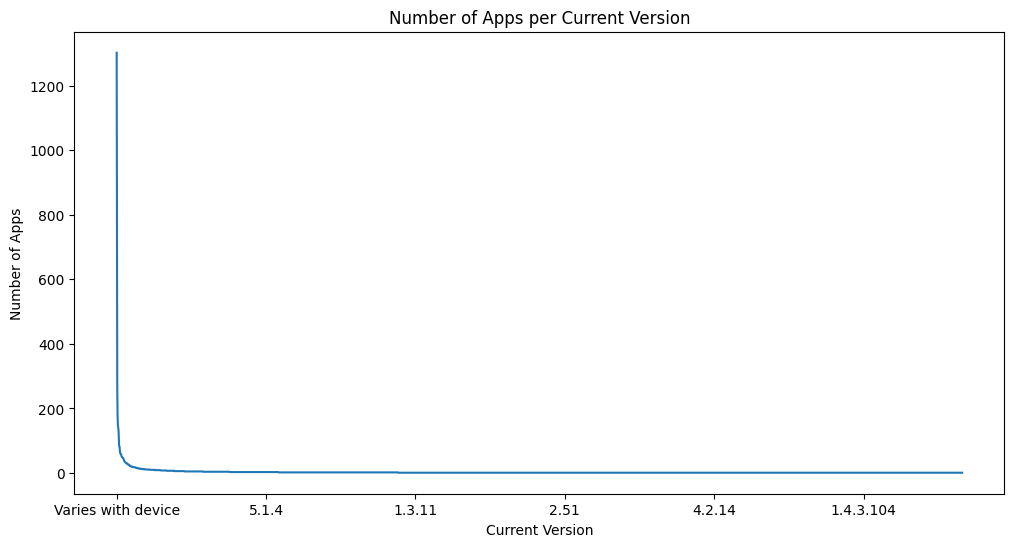

In [189]:
plt.figure(figsize=(12, 6))
df_ps['Current Ver'].value_counts().plot()
plt.title('Number of Apps per Current Version')
plt.xlabel('Current Version')
plt.ylabel('Number of Apps')
plt.show()


# Google Play Store User Reviews

In [190]:
print(os.path.join(dirname, filenames[1]))
df_ps_review = pd.read_csv(os.path.join(dirname, filenames[1]))
df_ps_review.info()

/kaggle/input/google-play-store/googleplaystore_user_reviews.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [191]:
df_ps_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [192]:
df_ps_review.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [193]:
df_ps_review.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [194]:
df_ps_review.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
64290     True
64291     True
64292     True
64293     True
64294     True
Length: 64295, dtype: bool

In [195]:
df_ps_review.duplicated().sum()

33616

In [196]:
df_ps_review = df_ps_review.drop_duplicates()

In [197]:
df_ps_review.duplicated().sum()

0

In [198]:
for column in df_ps_review:
        print("Column"," ",column,"  uniquevalue are :", df_ps_review[column].nunique())
        print(df_ps_review[column].unique())
        print("------------------------------------------------------------------")

Column   App   uniquevalue are : 1074
['10 Best Foods for You' '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室' '11st' ...
 'Hotwire Hotel & Car Rental App' 'Housing-Real Estate & Property'
 'Houzz Interior Design Ideas']
------------------------------------------------------------------
Column   Translated_Review   uniquevalue are : 27994
['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"'
 'This help eating healthy exercise regular basis' nan ...
 'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.'
 'I property business got link SMS happy performance still guys need raise bar guys Cheers'
 'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active']
------------------------------------------------------------------
Column   Sentiment   uniquevalue are : 3
['Positive' nan 'Neutral' 'Negative']
----------------------------

In [199]:
for column in df_ps_review:
        print("Column"," ",column,"  value count is :", df_ps_review[column].value_counts())
        print("------------------------------------------------------------------")

Column   App   value count is : App
Facebook                          131
Episode - Choose Your Story       125
Angry Birds Classic               108
Family Locator - GPS Tracker      106
Google Photos                     102
                                 ... 
Fancy                               1
CBS - Full Episodes & Live TV       1
Fair: A New Way To Own A Car        1
FREE Stock Market Trading Tips      1
Houzz Interior Design Ideas         1
Name: count, Length: 1074, dtype: int64
------------------------------------------------------------------
Column   Translated_Review   value count is : Translated_Review
Good                                                                                                                          137
Nice                                                                                                                          105
Great                                                                                                              

In [200]:
for column in df_ps_review:
        print( "column name:", column, "- misisng values ",df_ps_review[column].isnull().sum())
        print("------------------------------------------------------------------") 

column name: App - misisng values  0
------------------------------------------------------------------
column name: Translated_Review - misisng values  987
------------------------------------------------------------------
column name: Sentiment - misisng values  982
------------------------------------------------------------------
column name: Sentiment_Polarity - misisng values  982
------------------------------------------------------------------
column name: Sentiment_Subjectivity - misisng values  982
------------------------------------------------------------------


In [201]:
for column in df_ps_review:
    missing_values = df_ps_review[column].isnull().sum()
    if missing_values > 0:
        print("-------------------------")
        print("column name:", column, "- missing values:", missing_values)
        print("------------------------------------------------------------------")

-------------------------
column name: Translated_Review - missing values: 987
------------------------------------------------------------------
-------------------------
column name: Sentiment - missing values: 982
------------------------------------------------------------------
-------------------------
column name: Sentiment_Polarity - missing values: 982
------------------------------------------------------------------
-------------------------
column name: Sentiment_Subjectivity - missing values: 982
------------------------------------------------------------------


In [202]:
df_ps_review.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,29697.000000,29697.000000
mean,0.188836,0.490848
std,0.355672,0.266029
min,-1.000000,0.000000
25%,0.000000,0.350000
50%,0.157143,0.514286
75%,0.422500,0.652500
max,1.000000,1.000000


In [203]:
df_ps_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30679 entries, 0 to 64236
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     30679 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29697 non-null  object 
 3   Sentiment_Polarity      29697 non-null  float64
 4   Sentiment_Subjectivity  29697 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


# 2.1 - Sentiment

In [204]:
df_ps_review['Sentiment'].describe()


count        29697
unique           3
top       Positive
freq         19015
Name: Sentiment, dtype: object

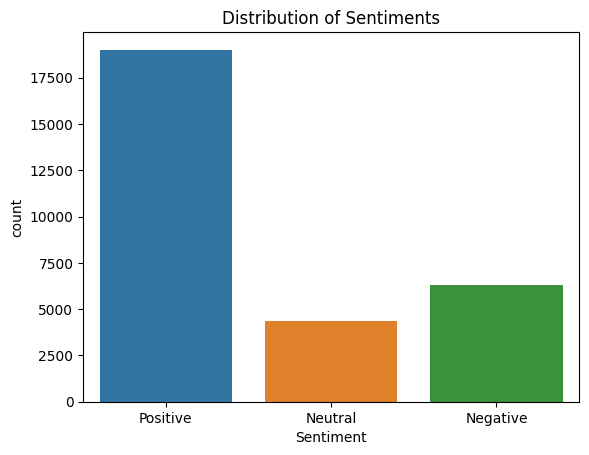

In [205]:
sns.countplot(x='Sentiment', data=df_ps_review)
plt.title('Distribution of Sentiments')
plt.show()

In [206]:
df_ps_review['Sentiment'].isnull().sum()


982

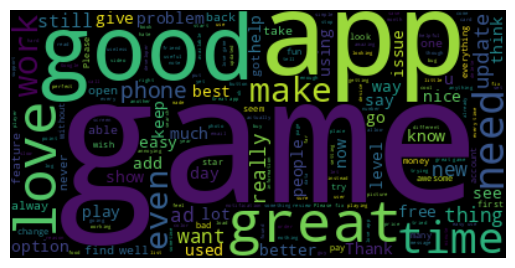

In [207]:


sentiment_wordcloud = WordCloud().generate(' '.join(df_ps_review['Translated_Review'].dropna()))
plt.imshow(sentiment_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


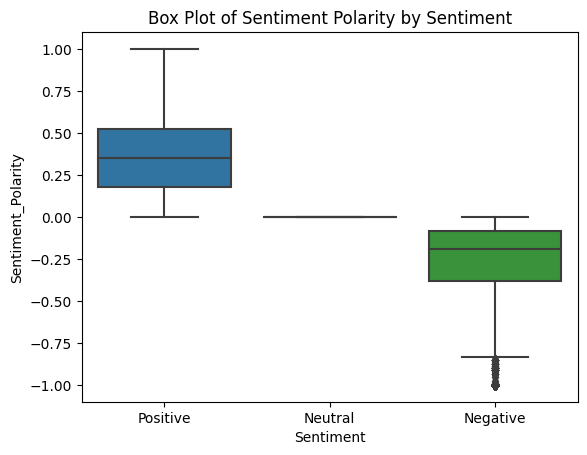

In [208]:
sns.boxplot(x='Sentiment', y='Sentiment_Polarity', data=df_ps_review)
plt.title('Box Plot of Sentiment Polarity by Sentiment')
plt.show()


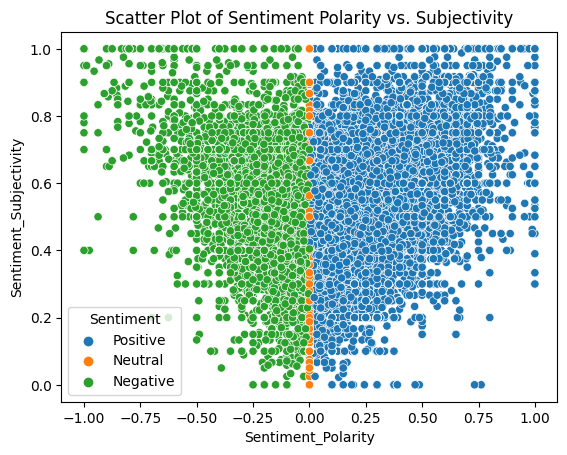

In [209]:
sns.scatterplot(x='Sentiment_Polarity', y='Sentiment_Subjectivity', hue='Sentiment', data=df_ps_review)
plt.title('Scatter Plot of Sentiment Polarity vs. Subjectivity')
plt.show()


# 2.2 - Sentiment_Polarity

In [210]:
df_ps_review['Sentiment_Polarity'].describe()


count    29697.000000
mean         0.188836
std          0.355672
min         -1.000000
25%          0.000000
50%          0.157143
75%          0.422500
max          1.000000
Name: Sentiment_Polarity, dtype: float64

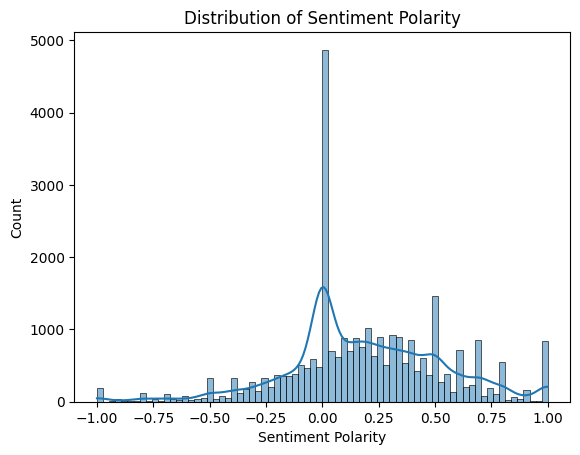

In [211]:


sns.histplot(df_ps_review['Sentiment_Polarity'], kde=True)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.show()


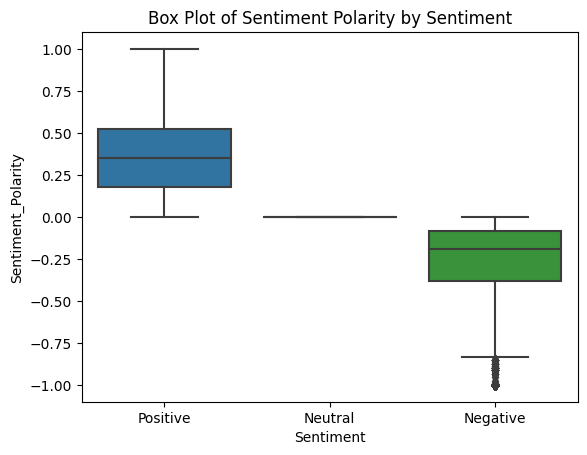

In [212]:
sns.boxplot(x='Sentiment', y='Sentiment_Polarity', data=df_ps_review)
plt.title('Box Plot of Sentiment Polarity by Sentiment')
plt.show()


In [213]:
df_ps_review[['Sentiment_Polarity', 'Sentiment_Subjectivity']].corr()


,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.272364
Sentiment_Subjectivity,0.272364,1.000000


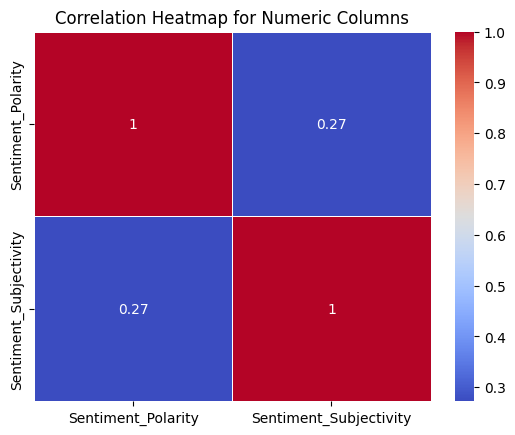

In [214]:
# Selecting only numeric columns from the DataFrame
numeric_columns = df_ps_review.select_dtypes(include=['float64']).columns

# Compute the correlation matrix for numeric columns
numeric_corr = df_ps_review[numeric_columns].corr()

# Plot the correlation heatmap
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Columns')
plt.show()

# Joining both CSVs

In [215]:
merged_df = pd.merge(df_ps, df_ps_review, on='App', how='inner')
print(merged_df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


# Relationship between Sentiment and Rating

In [216]:
merged_df[['Sentiment_Polarity', 'Rating']].corr()


,Sentiment_Polarity,Rating
Sentiment_Polarity,1.000000,0.075309
Rating,0.075309,1.000000


# Top Apps with the Highest Positive Sentiment:

In [217]:
top_positive_apps = merged_df.sort_values(by='Sentiment_Polarity', ascending=False)[['App', 'Sentiment_Polarity']].head(10)
top_positive_apps

,App,Sentiment_Polarity
39004,"Free TV Shows App:News, TV Series, Episode, Mo...",1.0
37193,Dropbox,1.0
11341,10 Best Foods for You,1.0
37154,Dropbox,1.0
29762,"Cymera Camera- Photo Editor, Filter,Collage,La...",1.0
29761,"Cymera Camera- Photo Editor, Filter,Collage,La...",1.0
2109,Google Ads,1.0
11334,10 Best Foods for You,1.0
29759,"Cymera Camera- Photo Editor, Filter,Collage,La...",1.0
11332,10 Best Foods for You,1.0


# Distribution of Sentiment Polarity by App Category:



In [218]:
merged_df.groupby('Category')['Sentiment_Polarity'].mean()


Category
ART_AND_DESIGN         0.233363
AUTO_AND_VEHICLES      0.343119
BEAUTY                 0.199734
BOOKS_AND_REFERENCE    0.237410
BUSINESS               0.193796
COMICS                 0.457056
COMMUNICATION          0.175969
DATING                 0.168680
EDUCATION              0.291267
ENTERTAINMENT          0.135963
EVENTS                 0.375086
FAMILY                 0.123537
FINANCE                0.176793
FOOD_AND_DRINK         0.282055
GAME                   0.060108
HEALTH_AND_FITNESS     0.288170
HOUSE_AND_HOME         0.226041
LIBRARIES_AND_DEMO     0.239990
LIFESTYLE              0.222711
MAPS_AND_NAVIGATION    0.259767
MEDICAL                0.243316
NEWS_AND_MAGAZINES     0.150623
PARENTING              0.313316
PERSONALIZATION        0.254056
PHOTOGRAPHY            0.222725
PRODUCTIVITY           0.187303
SHOPPING               0.193992
SOCIAL                 0.087985
SPORTS                 0.180064
TOOLS                  0.214539
TRAVEL_AND_LOCAL       0.200219

# Average Rating for Positive, Neutral, and Negative Sentiments:

In [219]:
merged_df.groupby('Sentiment')['Rating'].mean()


Sentiment
Negative    4.307706
Neutral     4.243703
Positive    4.347002
Name: Rating, dtype: float64

# Sentiment Distribution in Paid vs. Free Apps:

In [220]:
merged_df.groupby(['Type', 'Sentiment']).size().unstack().fillna(0)


Sentiment,Negative,Neutral,Positive
Type,,,
Free,9595,5044,25413
Paid,64,26,280


# Word Cloud for Positive and Negative Reviews:


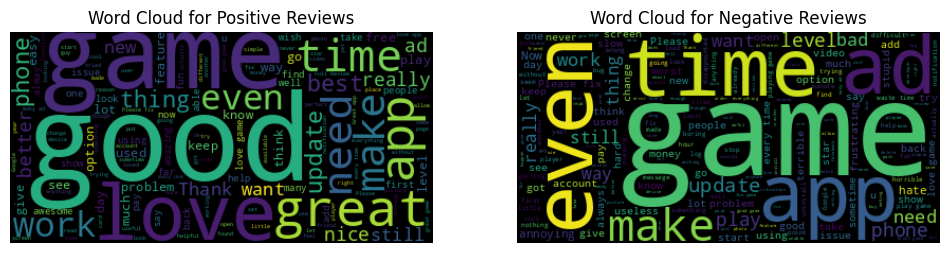

In [221]:


positive_reviews = ' '.join(merged_df[merged_df['Sentiment'] == 'Positive']['Translated_Review'].dropna())
negative_reviews = ' '.join(merged_df[merged_df['Sentiment'] == 'Negative']['Translated_Review'].dropna())

wordcloud_positive = WordCloud().generate(positive_reviews)
wordcloud_negative = WordCloud().generate(negative_reviews)

# Plot the word clouds side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud for Positive Reviews')

axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud for Negative Reviews')

plt.show()


# Relationship between Reviews and Sentiment Polarity:



In [222]:
merged_df[['Reviews', 'Sentiment_Polarity']].corr()


,Reviews,Sentiment_Polarity
Reviews,1.000000,-0.094467
Sentiment_Polarity,-0.094467,1.000000


# Sentiment Trends Over Time:

In [223]:
# merged_df.set_index('Last Updated', inplace=True)
# sentiment_trends = merged_df.resample('M')['Sentiment_Polarity'].mean()
# print(merged_df.columns)

# Lets suppose the app ratings depends on the number of installs

Mean Squared Error: 0.26290292407077004
R-squared: 0.0006841415109483107


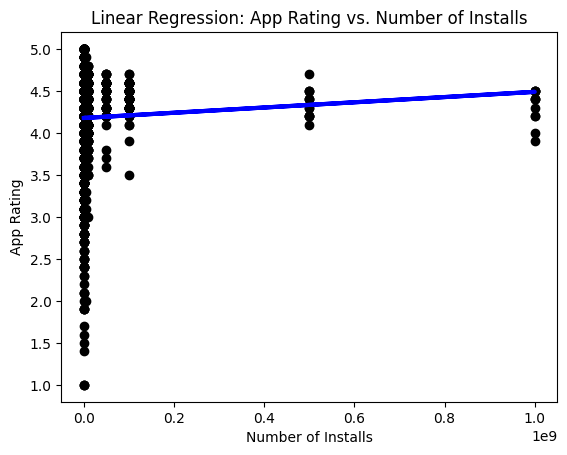

In [224]:


# Drop rows with missing values in the columns of interest
df_ps = df_ps.dropna(subset=['Rating', 'Installs'])

# Select relevant columns
df_subset = df_ps[['Rating', 'Installs']]

# Split the data into features (X) and target variable (y)
X = df_subset[['Installs']]
y = df_subset['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results (optional)
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Number of Installs')
plt.ylabel('App Rating')
plt.title('Linear Regression: App Rating vs. Number of Installs')
plt.show()


# Lets suppose the app rating depends on sentiment polarity

Mean Squared Error: 0.08140619901758063
R-squared: 0.0062056875110507725


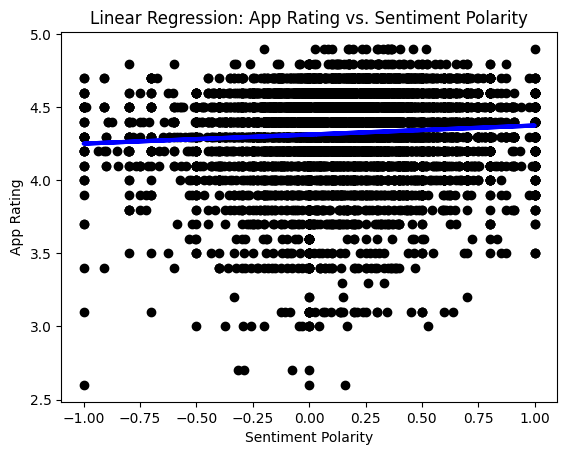

In [225]:


# Drop rows with missing values in the 'Rating' and 'Sentiment_Polarity' columns
df_subset = merged_df[['Rating', 'Sentiment_Polarity']].dropna()

# Split the data into features (X) and target variable (y)
X = df_subset[['Sentiment_Polarity']]
y = df_subset['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results (optional)
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Sentiment Polarity')
plt.ylabel('App Rating')
plt.title('Linear Regression: App Rating vs. Sentiment Polarity')
plt.show()


# Lets suppose app rating depends on sentiment subjectivity

Mean Squared Error: 0.08131871311279874
R-squared: 0.0072737019331025055


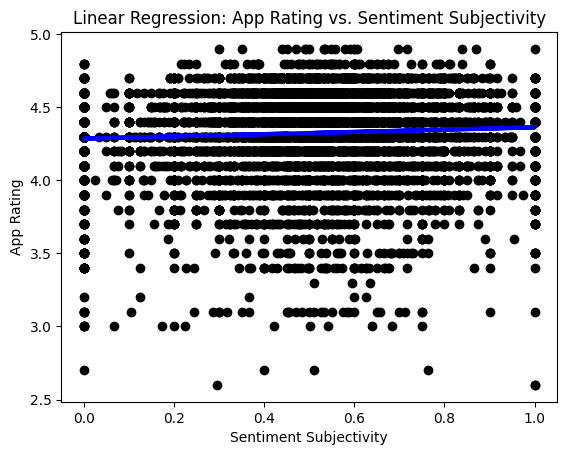

In [226]:




# Drop rows with missing values in the 'Rating' and 'Sentiment_Subjectivity' columns
df_subset = merged_df[['Rating', 'Sentiment_Subjectivity']].dropna()

# Split the data into features (X) and target variable (y)
X = df_subset[['Sentiment_Subjectivity']]
y = df_subset['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results (optional)
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('App Rating')
plt.title('Linear Regression: App Rating vs. Sentiment Subjectivity')
plt.show()
